In [2]:
# importing all dependencies
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from sklearn import model_selection
import seaborn as sns

In [3]:
# Lets see the data provided by wolt.
dataframe = pd.read_csv('data_exercise_01.csv')
dataframe.head(5)

,respondent_id,gender,age,brand1,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10
0,1,Male,45.0,VW,Mercedes,Audi,Hyundai,Daewoo,NaN,NaN,NaN,NaN,NaN
1,2,Male,35.0,Porsche,BMW,VW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,40.0,Audi,Honda,Toyota,Renault,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Female,46.0,Daewoo,Opel,VW,Chrysler,BMW,NaN,NaN,NaN,NaN,NaN
4,5,Female,30.0,Lexus,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Assignment 1

Transform the wide source data into a tall format which has a record for each combination of respondent_id and brand. This data has to be saved into CSV.


In [4]:
# lets remove the unwanted fields
assignment1 = dataframe
assignment1 = assignment1.drop(["gender", "age"], axis=1)
assignment1.head()

,respondent_id,brand1,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10
0,1,VW,Mercedes,Audi,Hyundai,Daewoo,NaN,NaN,NaN,NaN,NaN
1,2,Porsche,BMW,VW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Audi,Honda,Toyota,Renault,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Daewoo,Opel,VW,Chrysler,BMW,NaN,NaN,NaN,NaN,NaN
4,5,Lexus,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
result = assignment1.set_index("respondent_id").stack().reset_index(-1, drop=True)
result.to_csv('data1.csv')

In [6]:
#Lets view the tall version
tall = pd.read_csv('data1.csv')
tall.head()

,1,VW
0,1,Mercedes
1,1,Audi
2,1,Hyundai
3,1,Daewoo
4,2,Porsche


Assignment 1 looks like its complete.

# Assignment 2

In [7]:
#lets see if our dataframe is still alive
dataframe.head(5)

,respondent_id,gender,age,brand1,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10
0,1,Male,45.0,VW,Mercedes,Audi,Hyundai,Daewoo,NaN,NaN,NaN,NaN,NaN
1,2,Male,35.0,Porsche,BMW,VW,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,40.0,Audi,Honda,Toyota,Renault,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Female,46.0,Daewoo,Opel,VW,Chrysler,BMW,NaN,NaN,NaN,NaN,NaN
4,5,Female,30.0,Lexus,Volvo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
assignment2 = dataframe
# Lets see how the data is described
assignment2.describe()

,respondent_id,age
count,20000.000000,17999.000000
mean,10000.500000,40.070504
std,5773.647028,9.935752
min,1.000000,18.000000
25%,5000.750000,33.000000
50%,10000.500000,40.000000
75%,15000.250000,47.000000
max,20000.000000,80.000000


In [9]:
# lets see what are the different car brands for brand1
assignment2['brand1'].value_counts()

VW          2633
BMW         1790
Audi        1370
Fiat        1360
Opel        1309
Ford        1296
Honda       1083
Lexus       1062
Volvo       1046
Dodge       1034
Daewoo       888
Toyota       870
Hyundai      760
Renault      758
Porsche      744
Peugeot      729
Chrysler     634
Mercedes     634
Name: brand1, dtype: int64

In [10]:
# Now for brand2
assignment2['brand2'].value_counts()

VW          2221
BMW         1561
Ford        1249
Opel        1220
Fiat        1218
Audi        1198
Lexus       1007
Honda        997
Dodge        965
Volvo        951
Toyota       844
Daewoo       829
Peugeot      731
Renault      716
Porsche      702
Hyundai      695
Mercedes     648
Chrysler     631
Name: brand2, dtype: int64

looks like people normally guess VM and BMW first

In [11]:
# lets look at the age distribution
print(' mean age ' , assignment2.age.mean())
print(' max age ' , assignment2.age.min())
print(' min age ' , assignment2.age.max())
print(' std age ' , assignment2.age.std())

(' mean age ', 40.07050391688427)
(' max age ', 18.0)
(' min age ', 80.0)
(' std age ', 9.9357518556287623)


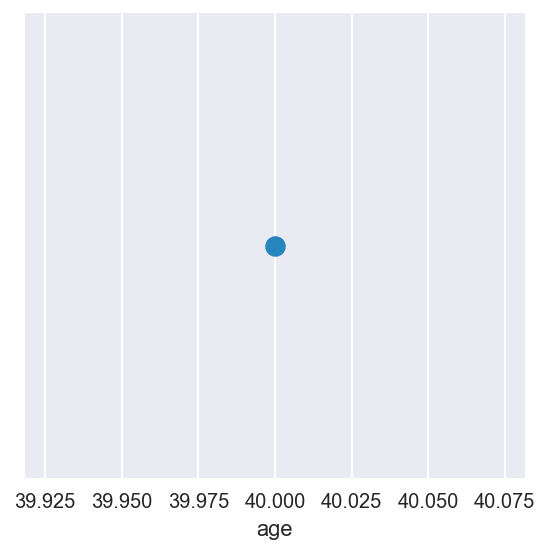

In [12]:
#lets check out the median age in this group
sns.factorplot("age", data=assignment2, palette="PuBu_d", estimator=np.median);


Plotting age by brand - Since there is wide range of age it gets squashed.

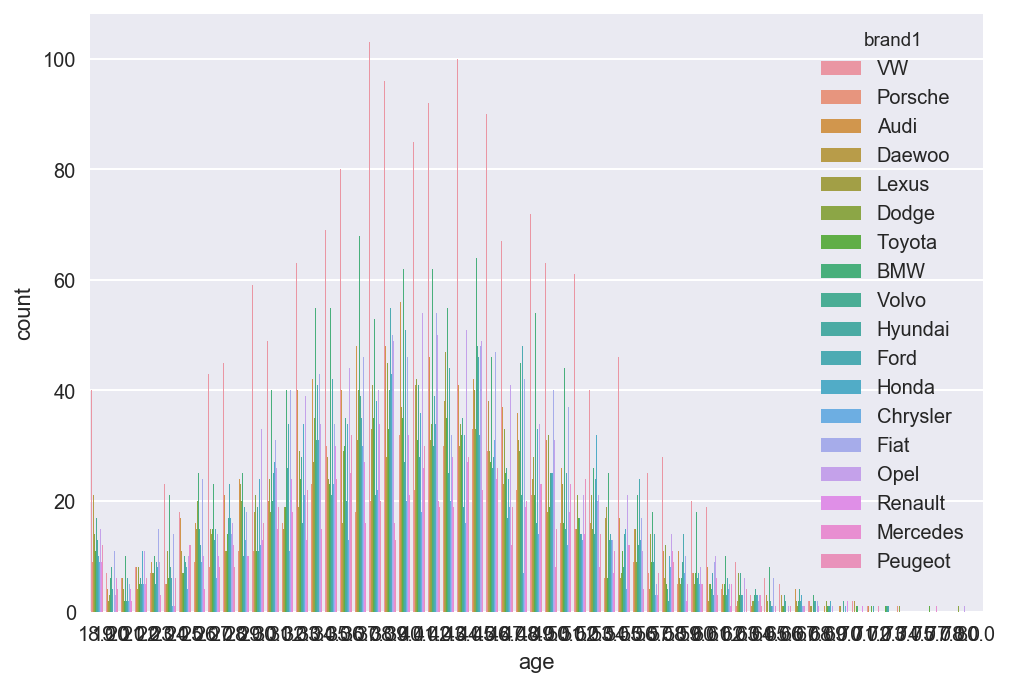

In [16]:
sns.countplot(x="age", hue="brand1", data=assignment2)

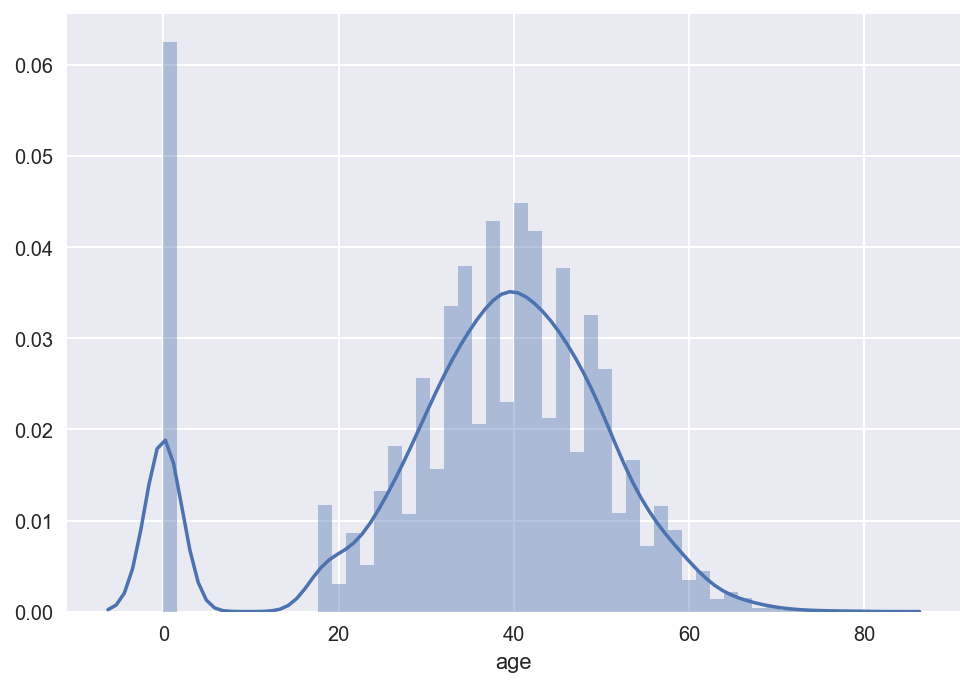

In [18]:
assignment2.fillna(value='0', inplace=True)
sns.distplot(assignment2["age"].astype(int));

The zero shows crazy amount of Na values but here above chart is the age distribuation.

The Graph above show age distribution with car recalls.

Alright! Lets see how many respondent recalled how many brands

In [19]:
df = pd.DataFrame()
for index, row in assignment2.iterrows():
    recall = 0
    if(row[3] != '0'):
        recall += 1
    if(row[4] != '0'):
        recall += 1
    if(row[5] != '0'):
        recall += 1
    if(row[6] != '0'):
        recall += 1
    if(row[7] != '0'):
        recall += 1
    if(row[8] != '0'):
        recall += 1
    if(row[9] != '0'):
        recall += 1
    if(row[10] != '0'):
        recall += 1
    if(row[11] != '0'):
        recall += 1
    if(row[12] != '0'):
        recall += 1
    df = df.append({'respondent': row[0],'age':row[2],'Recall No': recall, 'Gender' : row[1]}, ignore_index=True)

In [20]:
df.head()

,Gender,Recall No,age,respondent
0,Male,5.0,45,1.0
1,Male,3.0,35,2.0
2,Female,4.0,40,3.0
3,Female,5.0,46,4.0
4,Female,2.0,30,5.0


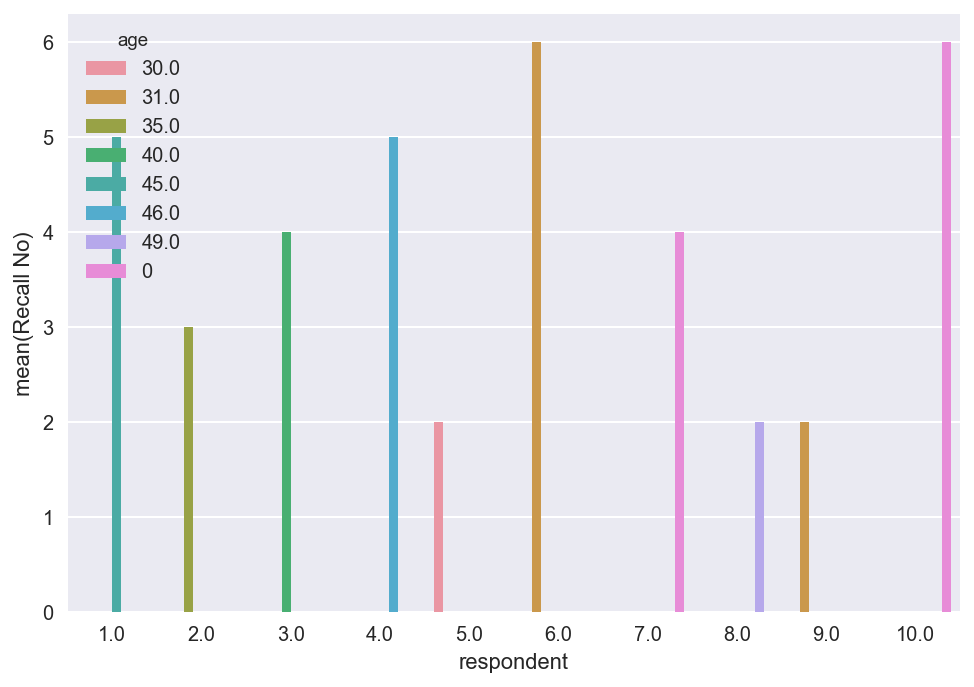

In [25]:
sns.barplot(x="respondent", y="Recall No", hue="age", data=df.head(10))

So looks like most of the people in age 40 or something can recall more stuff. Weird...

In [26]:
# changing everything to float and gender to 1 and 0
df['Gender'].replace(['Male','Female'],[1,0],inplace=True) # 1[Male] 0[Femaile]
df.age = df.age.astype(float)
df.head()

,Gender,Recall No,age,respondent
0,1,5.0,45.0,1.0
1,1,3.0,35.0,2.0
2,0,4.0,40.0,3.0
3,0,5.0,46.0,4.0
4,0,2.0,30.0,5.0


In [27]:
# lets see how it looks for gender distribution against Recall No ( Notice that zero is not deleted from
# table so there is alot of noise in this data, but I am still using it.)

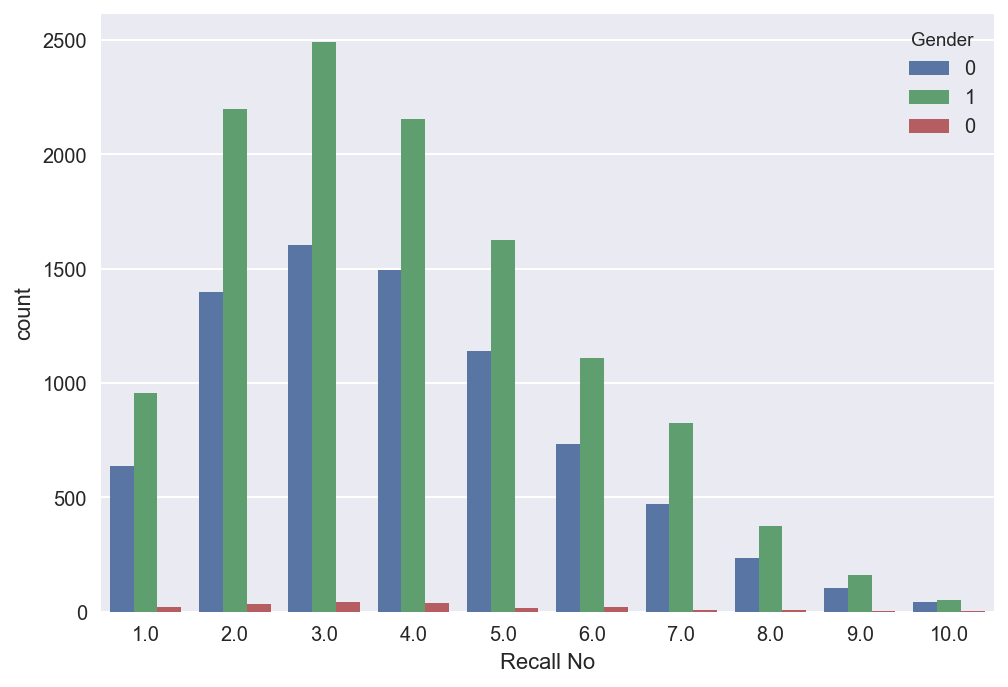

In [29]:
sns.countplot(x="Recall No", hue="Gender", data=df)

# Assignment 3 & 4

In [29]:
# This assignment I am not so sure about, but I will still proceed with the data..

In [30]:
assignment3 = df
assignment3.head()

,Gender,Recall No,age,respondent
0,1,5.0,45.0,1.0
1,1,3.0,35.0,2.0
2,0,4.0,40.0,3.0
3,0,5.0,46.0,4.0
4,0,2.0,30.0,5.0


In [31]:
assignment3 = assignment3.drop(['respondent'], axis=1)
assignment3.head()

,Gender,Recall No,age
0,1,5.0,45.0
1,1,3.0,35.0
2,0,4.0,40.0
3,0,5.0,46.0
4,0,2.0,30.0


Lets mess around with the data...by playing a guessing game by seeing which age group recalls the highest brand.

# Neural Network ( Deep Learning)

In [43]:
# lets convert the data to vectors and pass it through a neural network.

In [44]:
inputX = assignment3.loc[:, ['age']].as_matrix()
inputY = assignment3.loc[:, ['Recall No']].as_matrix()
print('inputX shape', inputX.shape)
print('inputY shape', inputY.shape)

inputX shape (20000, 1)
inputY shape (20000, 1)


In [33]:
def NN():
    net = tflearn.input_data(shape=[None, 1])
    net = tflearn.fully_connected(net, 32)
    net = tflearn.fully_connected(net, 32)
    net = tflearn.fully_connected(net, 1, activation='softmax')
    net = tflearn.regression(net , learning_rate=0.001)
    model = tflearn.DNN(net)
    return model

In [34]:
model = NN()
# Training
model.fit(inputX, inputY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=8)

Training Step: 1439  | time: 0.631s
| Adam | epoch: 008 | loss: 0.00000 - binary_acc: 0.0755 -- iter: 17900/18000
Training Step: 1440  | time: 1.641s
| Adam | epoch: 008 | loss: 0.00000 - binary_acc: 0.0755 | val_loss: 0.00000 - val_acc: 0.0765 -- iter: 18000/18000
--


In [37]:
pred = model.predict([inputX[5]])
print(np.argmax(pred))

0


So the neural network does a very bad job, since there was no labels to the test data, there was alot of noise.
This all can be improved by getting more data to the set and getting labels or making my own labels.

# Assignment 5


This data could be more relevent if there were location and year of the servey was taken.
If the data-set had labels which would help in predicting a outcome. 
Better example dataset - https://www.kaggle.com/wendykan/lending-club-loan-data
